In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
num_of_pixels = 500
num_of_pixel_x = 500
num_of_pixel_y = 500
electrons_per_photon = 1500 #electrons

In [4]:
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
#the random.random() makes a random number between 0 & 1, so we multiply it to get the range we want
photon_sphere_x = random.random() * pixel_edge_length * num_of_pixel_x #microns
photon_sphere_y = random.random() * pixel_edge_length * num_of_pixel_y #microns
photon_sphere_z = 15 #microns
print("photon hit at [x,y] = [" + str(photon_sphere_x) + ", " + str(photon_sphere_y) + "] microns")

photon hit at [x,y] = [479.4833451210537, 2025.8417170617097] microns


In [7]:
#photon_sphere_x and photon_sphere_y is the center point of the sphere
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns

In [8]:
detector_array_x = np.arange(num_of_pixel_x) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(num_of_pixel_y) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [9]:
#redefining variables as arrays to be more precise
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere position  in microns " + str(photon_sphere_microns))
print("sphere position in pixel " + str(photon_sphere_pixel))


sphere position  in microns [479.4833451210537, 2025.8417170617097, 15]
sphere position in pixel [31.965556341403577, 135.05611447078064]


In [10]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [31, 135]
closest pixel's center in microns: [472.5, 2032.5]


In [11]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 6.983345121053674 microns, distance in y: 6.658282938290313 microns
total distance from center of sphere to center of pixel: 9.64882587500013 microns


In [12]:

#sm_pixel_edge_length = .5 #microns
#sm_pixel_half_length = sm_pixel_edge_length/2 #microns
#graph_num_of_pixels_x = 3
#sm_num_of_pixels = pixel_edge_length * (1 / sm_pixel_edge_length) * graph_num_of_pixels_x
#sm_num_of_pixels = 45 when sm_pixel_edge_length = 1 micron
#sm_third_pixels = sm_num_of_pixels / 3
#sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
#sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
#sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
#sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y - 1] - pixel_half_length) + sm_pixel_edge_length

In [13]:
sm_pixel_edge_length = .5 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_num_of_pixels = 90
sm_third_pixels = sm_num_of_pixels / 3
sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y -1] - pixel_half_length) + sm_pixel_edge_length   

In [14]:
sm_x_cen

array([450.5, 451. , 451.5, 452. , 452.5, 453. , 453.5, 454. , 454.5,
       455. , 455.5, 456. , 456.5, 457. , 457.5, 458. , 458.5, 459. ,
       459.5, 460. , 460.5, 461. , 461.5, 462. , 462.5, 463. , 463.5,
       464. , 464.5, 465. , 465.5, 466. , 466.5, 467. , 467.5, 468. ,
       468.5, 469. , 469.5, 470. , 470.5, 471. , 471.5, 472. , 472.5,
       473. , 473.5, 474. , 474.5, 475. , 475.5, 476. , 476.5, 477. ,
       477.5, 478. , 478.5, 479. , 479.5, 480. , 480.5, 481. , 481.5,
       482. , 482.5, 483. , 483.5, 484. , 484.5, 485. , 485.5, 486. ,
       486.5, 487. , 487.5, 488. , 488.5, 489. , 489.5, 490. , 490.5,
       491. , 491.5, 492. , 492.5, 493. , 493.5, 494. , 494.5, 495. ])

In [15]:
detector_array_x[closest_pixel_x]

array([472.5])

In [16]:
sm_y_cen

array([2010.5, 2011. , 2011.5, 2012. , 2012.5, 2013. , 2013.5, 2014. ,
       2014.5, 2015. , 2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. ,
       2018.5, 2019. , 2019.5, 2020. , 2020.5, 2021. , 2021.5, 2022. ,
       2022.5, 2023. , 2023.5, 2024. , 2024.5, 2025. , 2025.5, 2026. ,
       2026.5, 2027. , 2027.5, 2028. , 2028.5, 2029. , 2029.5, 2030. ,
       2030.5, 2031. , 2031.5, 2032. , 2032.5, 2033. , 2033.5, 2034. ,
       2034.5, 2035. , 2035.5, 2036. , 2036.5, 2037. , 2037.5, 2038. ,
       2038.5, 2039. , 2039.5, 2040. , 2040.5, 2041. , 2041.5, 2042. ,
       2042.5, 2043. , 2043.5, 2044. , 2044.5, 2045. , 2045.5, 2046. ,
       2046.5, 2047. , 2047.5, 2048. , 2048.5, 2049. , 2049.5, 2050. ,
       2050.5, 2051. , 2051.5, 2052. , 2052.5, 2053. , 2053.5, 2054. ,
       2054.5, 2055. ])

In [17]:
sm_z_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length

In [18]:
for i in range(sm_num_of_pixels):
    for j in range(sm_num_of_pixels):
        for k in range(sm_num_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

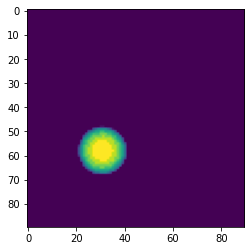

In [21]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [22]:
np.sum(img)

4165.0

In [23]:
percent_pixel_1 = np.sum(img[0:int(sm_third_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_third_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[0:int(sm_third_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_5 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_6 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_7 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_8 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_9 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)

In [24]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")
print("% in fifth pixel: " + str(percent_pixel_5 * 100) + "%")
print("% in sixth pixel: " + str(percent_pixel_6 * 100) + "%")
print("% in seventh pixel: " + str(percent_pixel_7 * 100) + "%")
print("% in eigth pixel: " + str(percent_pixel_8 * 100) + "%")
print("% in ninth pixel: " + str(percent_pixel_9 * 100) + "%")

% in first pixel: 0.0%
% in second pixel: 0.0%
% in third pixel: 0.0%
% in fourth pixel: 25.594237695078032%
% in fifth pixel: 35.84633853541417%
% in sixth pixel: 0.0%
% in seventh pixel: 15.774309723889557%
% in eigth pixel: 22.785114045618247%
% in ninth pixel: 0.0%


In [25]:
detector_array[closest_pixel_x,closest_pixel_y] += percent_pixel_1 * electrons_per_photon

In [26]:
electrons_pixel_1 = round(electrons_per_photon * percent_pixel_1)
electrons_pixel_2 = round(electrons_per_photon * percent_pixel_2)
electrons_pixel_3 = round(electrons_per_photon * percent_pixel_3)
electrons_pixel_4 = round(electrons_per_photon * percent_pixel_4)
electrons_pixel_5 = round(electrons_per_photon * percent_pixel_5)
electrons_pixel_6 = round(electrons_per_photon * percent_pixel_6)
electrons_pixel_7 = round(electrons_per_photon * percent_pixel_7)
electrons_pixel_8 = round(electrons_per_photon * percent_pixel_8)
electrons_pixel_9 = round(electrons_per_photon * percent_pixel_9)

In [27]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [0.]
5. [0.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [28]:
detector_array[closest_pixel_x - 1, closest_pixel_y - 1] += electrons_pixel_1
detector_array[closest_pixel_x, closest_pixel_y - 1] += electrons_pixel_2
detector_array[closest_pixel_x + 1, closest_pixel_y - 1] += electrons_pixel_3
detector_array[closest_pixel_x - 1, closest_pixel_y] += electrons_pixel_4
detector_array[closest_pixel_x, closest_pixel_y] += electrons_pixel_5
detector_array[closest_pixel_x + 1, closest_pixel_y] += electrons_pixel_6
detector_array[closest_pixel_x - 1, closest_pixel_y + 1] += electrons_pixel_7
detector_array[closest_pixel_x, closest_pixel_y + 1] += electrons_pixel_8
detector_array[closest_pixel_x + 1, closest_pixel_y + 1] += electrons_pixel_9

In [29]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [384.]
5. [538.]
6. [0.]
7. [237.]
8. [342.]
9. [0.]


In [30]:
#!!! sometimes this "check" doesnt work: ask if theres a better numpy function to be precise (less likely to work when sphere is in > 2 pixels)
check_tot_electrons = np.sum(detector_array)
if (check_tot_electrons == electrons_per_photon):
    print('No rounding error. total number of electrons = ' + str(electrons_per_photon))
else:
    print('rounding error: total number of electrons is not = ' + str(electrons_per_photon) + " it is = " + str(check_tot_electrons))

rounding error: total number of electrons is not = 1500 it is = 1501.0


In [31]:
#digitize array using np.digitize
#make array values integers
#how would you find the gain if you weren't given it?
#what kind of errors are introduced?
#how many times to measure a single photon to get rid of error?
#numpy.digitize(x, bins, right=False(optional))
#numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)

#assume 2 electrons/DN
#gain = (# of electrons per pixel) / (# of counts per pixel)
#stdev (photons)  =  sqrt(number of photons)

In [32]:
gain =  2 #electrons/analog to digital units (or data numbers)
#here the data in detector_array is still float it will become integer when digitized below
detector_array * (1 / gain)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
detector_array
#check to make sure this is OK (I'm not 100% confident on how "bins" work exactly)
detector_bins = np.array([10])
digitize_detector = np.digitize(detector_array, detector_bins)
digitize_detector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
#checking digitized array to confirm each pixel that has % of the photon is = 1
print('1. ' + str(digitize_detector[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(digitize_detector[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(digitize_detector[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(digitize_detector[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(digitize_detector[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(digitize_detector[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(digitize_detector[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(digitize_detector[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(digitize_detector[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0]
2. [0]
3. [0]
4. [1]
5. [1]
6. [0]
7. [1]
8. [1]
9. [0]


In [37]:
#NOTES:
#could you figure out, gain? figure out gain if the # of electrons per photon is known and output is known
#How well would you know it?  

#What kind of errors are introduced by the charge sharing and digitization? 
        # we already have a rounding error before digitization, but after digitizing it can cause errors 
        # because we have less information... we only know which pixels are "on"
#How many times do you need to measure this single photon signal to beat down those errors?

#The gain value is set by the electronics that read out the CCD chip. 
#Gain is expressed in units of electrons per count. 
#For example, a gain of 1.8 e-/count means that the camera produces 1 count for every 1.8 recorded electrons.
#Of course, we cannot split electrons into fractional parts, as in the case for a gain of 1.8 e-/count. 
#What this number means is that 4/5 of the time 1 count is produced from 2 electrons, and 1/5 of the time 1 count is produced from 1 electron. 
#This number is an average conversion ratio, based on changing large numbers of electrons into large numbers of counts.
#Note: This use of the term "gain" is in the opposite sense to the way a circuit designer would use the term since, 
#in electronic design, gain is considered to be an increase in the number of output units compared with the number of input units.